<a href="https://colab.research.google.com/github/Abdillah021/Portofolio-data-analyst/blob/main/analisi_sentiment_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis ribuan ulasan pelanggan Amazon

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = "/content/drive/MyDrive/Data set/amazon/train.ft.txt"
test = '/content/drive/MyDrive/Data set/amazon/test.ft.txt'



In [ ]:
#Fungsi ini digunakan untuk membaca file teks berformat khusus dan mengubahnya menjadi DataFrame Pandas.
#Ini sangat penting dalam pemrosesan data awal sebelum digunakan untuk analisis atau machine learning.
#NLP
#Hilangkan bagian __label__ dari label dan ubah menjadi integer: Misalnya __label__1 → 1, atau __label__0 → 0

def parse_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.split(' ', 1)
            label = int(label.replace('__label__', ''))
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=['label', 'text'])

In [ ]:
train = parse_data(train)
test = parse_data(test)

print("Train:")
train

Train:


,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!!: The high chair looks great when...
3599996,1,"Looks nice, low functionality: I have used thi..."
3599997,1,"compact, but hard to clean: We have a small ho..."
3599998,1,what is it saying?: not sure what this book is...


In [ ]:
df = train.copy()
df2 = test.copy()

In [ ]:
df.label = df.label.map({2:0, 1:1})  # 1 are negatives (targeted class), MENGUBAH BINER PADA LABEL
df2.label = df2.label.map({2:0, 1:1})  # 1 are negatives (targeted class)

df

,label,text
0,0,Stuning even for the non-gamer: This sound tra...
1,0,The best soundtrack ever to anything.: I'm rea...
2,0,Amazing!: This soundtrack is my favorite music...
3,0,Excellent Soundtrack: I truly like this soundt...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!!: The high chair looks great when...
3599996,1,"Looks nice, low functionality: I have used thi..."
3599997,1,"compact, but hard to clean: We have a small ho..."
3599998,1,what is it saying?: not sure what this book is...


In [ ]:
df.label.value_counts(normalize=True)
df2.label.value_counts(normalize=True) #normalize=True mengubah hasil menjadi proporsi/persentase (dalam bentuk desimal).

,proportion
label,
0,0.5
1,0.5


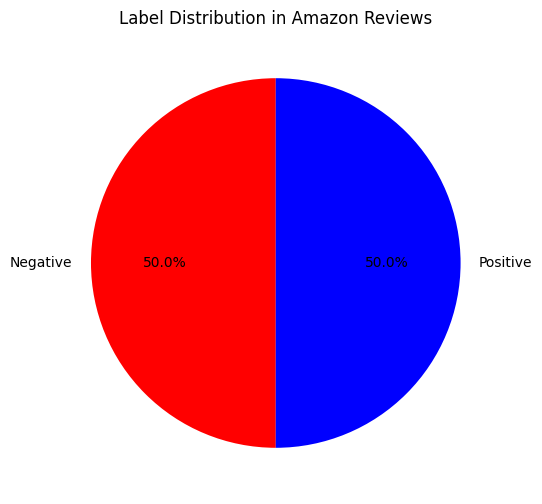

In [ ]:
label_counts = df['label'].value_counts().sort_index()
# Update label_names to reflect the new label values (0 and 1)
label_names = {0: 'Negative', 1: 'Positive'}
labels = [label_names[i] for i in label_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Label Distribution in Amazon Reviews')
plt.show()

In [ ]:
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)   # Hanya huruf
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df = df[['text','label']].dropna()
# df = df[df['sentiment'] != 'neutral']  # Fokus binary sentiment (positive vs negative)
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def label_sentiment(label):
    if label == 0:
        return "positive"
    else:
        return "negative"

df['sentiment'] = df['label'].apply(label_sentiment)

X = df['clean_text']
y = df['sentiment'] = df['label'].apply(label_sentiment)

# Convert text ke TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi dan fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[319463  40296]
 [ 37786 322455]]
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89    359759
    positive       0.89      0.90      0.89    360241

    accuracy                           0.89    720000
   macro avg       0.89      0.89      0.89    720000
weighted avg       0.89      0.89      0.89    720000



In [ ]:
sample = [" I love this product, it works great!", "Worst purchase i've ever made."]
#bersihin
sample_clean = [clean_text(s) for s in sample]
sample_vec = vectorizer.transform(sample_clean)
predictions = model.predict(sample_vec)
print(predictions)


['positive' 'negative']


In [ ]:
# Read the compressed file
#data = pd.read_csv(file_path, sep='\t', header=None, names=['text'], compression='bz2')

# Inspect the dataset
#print("Dataset Preview:")
#print(data.head())
#print(f"Total records: {len(data)}")

In [ ]:
filtered_df = df[df['sentiment'].isin(['positive', 'negative'])]


# Hitung jumlah masing-masing sentimen
sentiment_counts = filtered_df.groupby(['sentiment']).size()

# Tampilkan jumlah ulasan
print("\nJumlah ulasan positif/negatif:")
print(sentiment_counts)


Jumlah ulasan positif/negatif:
sentiment
negative    1800000
positive    1800000
dtype: int64
